In [3]:
import pandas as pd
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import log_loss,confusion_matrix
import plotly.express as px  
import sklearn
import math

In [4]:
results=pd.read_csv(r'results.csv',index_col=[0])


In [5]:
results

,numer,wynik,City,wiatr,kraj_zawodow,kraj_urodz,czy_kraj,wiek,pb_aktualne,nr_start_kariera,rok,nr_start_sezon,sb_aktualne,Temperature,Humidity,Pressure,Condition,Rain
0,14164603,11.40,2546,0.261719,176,61,0,19.55,NaN,1,2009,1,NaN,0.880000,0.265,0.964748,5.0,0.0
1,14164603,11.09,1773,0.433594,61,61,1,20.51,11.40,2,2010,1,NaN,NaN,NaN,NaN,NaN,NaN
2,14164603,11.23,3574,0.445312,61,61,1,20.53,11.09,3,2010,2,11.09,0.676667,0.690,0.975515,5.0,0.0
3,14164603,11.21,3574,0.324219,61,61,1,20.53,11.09,4,2010,3,11.09,0.676667,0.690,0.975515,5.0,0.0
4,14164603,10.93,3255,0.460938,64,61,0,21.42,11.09,5,2011,1,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581272,15054047,10.88,2614,0.410156,100,100,1,17.09,NaN,1,2022,1,NaN,NaN,NaN,NaN,NaN,NaN
581273,15054107,10.71,4101,0.421875,100,100,1,17.30,NaN,1,2022,1,NaN,0.593333,0.830,0.984336,2.0,1.0
581274,15054107,10.79,4101,0.394531,100,100,1,17.30,10.71,2,2022,2,10.71,0.593333,0.830,0.984336,2.0,1.0
581275,15054126,10.96,1630,0.367188,100,100,1,18.64,NaN,1,2022,1,NaN,0.648333,0.805,0.979275,3.0,0.0


In [6]:
results2 = results

In [7]:
results2 = results2[:90000]

In [8]:
results2 = results2[results2.wynik < 12]   #usuniecie wartosci odstajacych
results2

,numer,wynik,City,wiatr,kraj_zawodow,kraj_urodz,czy_kraj,wiek,pb_aktualne,nr_start_kariera,rok,nr_start_sezon,sb_aktualne,Temperature,Humidity,Pressure,Condition,Rain
0,14164603,11.40,2546,0.261719,176,61,0,19.55,NaN,1,2009,1,NaN,0.880000,0.265,0.964748,5.0,0.0
1,14164603,11.09,1773,0.433594,61,61,1,20.51,11.40,2,2010,1,NaN,NaN,NaN,NaN,NaN,NaN
2,14164603,11.23,3574,0.445312,61,61,1,20.53,11.09,3,2010,2,11.09,0.676667,0.690,0.975515,5.0,0.0
3,14164603,11.21,3574,0.324219,61,61,1,20.53,11.09,4,2010,3,11.09,0.676667,0.690,0.975515,5.0,0.0
4,14164603,10.93,3255,0.460938,64,61,0,21.42,11.09,5,2011,1,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89995,14202176,10.30,2171,0.343750,71,98,0,19.68,10.21,18,2002,14,10.21,0.630000,0.680,0.970300,5.0,0.0
89996,14202176,10.26,2171,0.382812,71,98,0,19.69,10.21,19,2002,15,10.21,0.648333,0.640,0.969317,4.0,0.0
89997,14202176,10.33,221,0.398437,96,98,0,19.77,10.21,20,2002,16,10.21,0.676667,0.830,0.967032,4.0,0.0
89998,14202176,10.23,221,0.332031,96,98,0,19.77,10.21,21,2002,17,10.21,0.676667,0.830,0.967032,4.0,0.0


In [9]:
kol_nan = []
for k in results2.columns:
    if results2.describe()[k]['count'] < len(results2):
        print(k, results2.describe()[k]['count'])
        kol_nan.append(k)

wiatr 85505.0
wiek 89585.0
pb_aktualne 87803.0
sb_aktualne 74804.0
Temperature 51401.0
Humidity 51401.0
Pressure 51401.0
Condition 50952.0
Rain 50952.0


In [10]:
for k in kol_nan:
    results2 = results2[results2[k].isna()==False]
results2

,numer,wynik,City,wiatr,kraj_zawodow,kraj_urodz,czy_kraj,wiek,pb_aktualne,nr_start_kariera,rok,nr_start_sezon,sb_aktualne,Temperature,Humidity,Pressure,Condition,Rain
2,14164603,11.23,3574,0.445312,61,61,1,20.53,11.09,3,2010,2,11.09,0.676667,0.69,0.975515,5.0,0.0
3,14164603,11.21,3574,0.324219,61,61,1,20.53,11.09,4,2010,3,11.09,0.676667,0.69,0.975515,5.0,0.0
12,14164603,10.91,3574,0.476562,61,61,1,22.62,10.82,13,2012,4,10.82,0.630000,0.68,0.974542,5.0,0.0
13,14164603,10.91,3574,0.472656,61,61,1,22.62,10.82,14,2012,5,10.82,0.630000,0.68,0.974542,5.0,0.0
18,14164603,11.16,3574,0.253906,61,61,1,24.58,10.82,19,2014,3,11.18,0.695000,0.61,0.978455,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89995,14202176,10.30,2171,0.343750,71,98,0,19.68,10.21,18,2002,14,10.21,0.630000,0.68,0.970300,5.0,0.0
89996,14202176,10.26,2171,0.382812,71,98,0,19.69,10.21,19,2002,15,10.21,0.648333,0.64,0.969317,4.0,0.0
89997,14202176,10.33,221,0.398437,96,98,0,19.77,10.21,20,2002,16,10.21,0.676667,0.83,0.967032,4.0,0.0
89998,14202176,10.23,221,0.332031,96,98,0,19.77,10.21,21,2002,17,10.21,0.676667,0.83,0.967032,4.0,0.0


In [11]:
wynik2 = results2['wynik']

In [12]:
results2 = results2.drop(['wynik'], axis = 1)
results2

,numer,City,wiatr,kraj_zawodow,kraj_urodz,czy_kraj,wiek,pb_aktualne,nr_start_kariera,rok,nr_start_sezon,sb_aktualne,Temperature,Humidity,Pressure,Condition,Rain
2,14164603,3574,0.445312,61,61,1,20.53,11.09,3,2010,2,11.09,0.676667,0.69,0.975515,5.0,0.0
3,14164603,3574,0.324219,61,61,1,20.53,11.09,4,2010,3,11.09,0.676667,0.69,0.975515,5.0,0.0
12,14164603,3574,0.476562,61,61,1,22.62,10.82,13,2012,4,10.82,0.630000,0.68,0.974542,5.0,0.0
13,14164603,3574,0.472656,61,61,1,22.62,10.82,14,2012,5,10.82,0.630000,0.68,0.974542,5.0,0.0
18,14164603,3574,0.253906,61,61,1,24.58,10.82,19,2014,3,11.18,0.695000,0.61,0.978455,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89995,14202176,2171,0.343750,71,98,0,19.68,10.21,18,2002,14,10.21,0.630000,0.68,0.970300,5.0,0.0
89996,14202176,2171,0.382812,71,98,0,19.69,10.21,19,2002,15,10.21,0.648333,0.64,0.969317,4.0,0.0
89997,14202176,221,0.398437,96,98,0,19.77,10.21,20,2002,16,10.21,0.676667,0.83,0.967032,4.0,0.0
89998,14202176,221,0.332031,96,98,0,19.77,10.21,21,2002,17,10.21,0.676667,0.83,0.967032,4.0,0.0


In [13]:
x = torch.tensor(results2.values, dtype=torch.float)

In [14]:
y = torch.tensor(wynik2.values, dtype=torch.float)

In [15]:
x[:5]

tensor([[1.4165e+07, 3.5740e+03, 4.4531e-01, 6.1000e+01, 6.1000e+01, 1.0000e+00,
         2.0530e+01, 1.1090e+01, 3.0000e+00, 2.0100e+03, 2.0000e+00, 1.1090e+01,
         6.7667e-01, 6.9000e-01, 9.7552e-01, 5.0000e+00, 0.0000e+00],
        [1.4165e+07, 3.5740e+03, 3.2422e-01, 6.1000e+01, 6.1000e+01, 1.0000e+00,
         2.0530e+01, 1.1090e+01, 4.0000e+00, 2.0100e+03, 3.0000e+00, 1.1090e+01,
         6.7667e-01, 6.9000e-01, 9.7552e-01, 5.0000e+00, 0.0000e+00],
        [1.4165e+07, 3.5740e+03, 4.7656e-01, 6.1000e+01, 6.1000e+01, 1.0000e+00,
         2.2620e+01, 1.0820e+01, 1.3000e+01, 2.0120e+03, 4.0000e+00, 1.0820e+01,
         6.3000e-01, 6.8000e-01, 9.7454e-01, 5.0000e+00, 0.0000e+00],
        [1.4165e+07, 3.5740e+03, 4.7266e-01, 6.1000e+01, 6.1000e+01, 1.0000e+00,
         2.2620e+01, 1.0820e+01, 1.4000e+01, 2.0120e+03, 5.0000e+00, 1.0820e+01,
         6.3000e-01, 6.8000e-01, 9.7454e-01, 5.0000e+00, 0.0000e+00],
        [1.4165e+07, 3.5740e+03, 2.5391e-01, 6.1000e+01, 6.1000e+01, 1.0

In [16]:
y[:5]

tensor([11.2300, 11.2100, 10.9100, 10.9100, 11.1600])

In [17]:
import torch.optim as optim

In [18]:
model = nn.Sequential(
        nn.Linear(17, 20),
        nn.ReLU(),
        nn.Linear(20,100),
        nn.Sigmoid(),
        nn.Linear(100,3)
    )
model.to()

Sequential(
  (0): Linear(in_features=17, out_features=20, bias=True)
  (1): ReLU()
  (2): Linear(in_features=20, out_features=100, bias=True)
  (3): Sigmoid()
  (4): Linear(in_features=100, out_features=3, bias=True)
)

In [19]:
criterion = torch.nn.MSELoss()  #zmienic kryterium
optimizer = optim.SGD(model.parameters(), lr = 0.00975)#, momentum = 0.9)   #lr - learning rate

#lr - zacznie mniejszy np. 10^-3
#0.0095 ->78%

In [20]:
epochs=50
losses=[]
for epoch in range(epochs):
    totalLoss = 0
    pred_wart = []
    y_copy=[]
    for i in range(len(x)):
        ypred = model(x[i])
        pred_wart.append(ypred)
        y_copy.append(y[i])
        loss = criterion(ypred, y[i])
        totalLoss+=loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    losses.append(totalLoss)
    print('Total loss: ', totalLoss)
    if epoch%50==0 or epoch==0:
        print('Total loss: ', totalLoss)

c:\Users\marci\.julia\conda\3\lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Total loss:  1556.2337141958874
Total loss:  1556.2337141958874
Total loss:  1347.882280014735
Total loss:  1347.8823042981671
Total loss:  1347.88237633736
Total loss:  1347.8823504395662


In [21]:
#sprawdzenie ile predykcji jest mniejszych od danego bledu
good = 0
wart = []
predyk = []
suma = 0
for i in range(len(y)):
    wart.append(y[i].item())
    predyk.append(pred_wart[i][2].item())
    suma += abs(y[i].item() - pred_wart[i][2].item())
    if abs(y[i].item() - pred_wart[i][2].item()) < 0.2:
        good += 1
print(good/len(y))

print('sredni blad:', suma/len(y)) #Mean Absolute Error
#<0.15 = 0.54 (z wartosciami odstajacymi)

0.7808176626603904
sredni blad: 0.13427208715896732


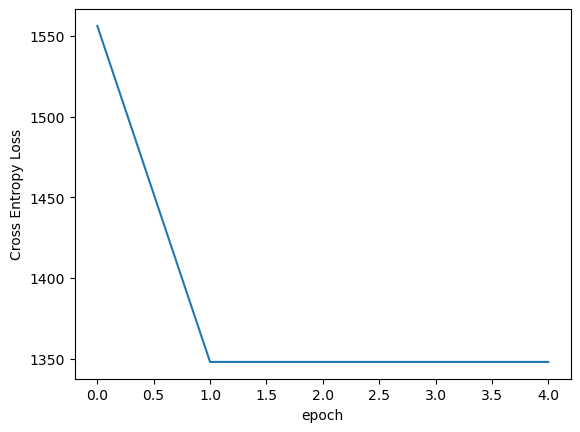

In [22]:
plt.plot(range(epochs), losses)#shows plot of the presented system
plt.ylabel('Cross Entropy Loss')
plt.xlabel('epoch')
plt.show()


In [23]:
sum_val=0.0
n=len(y)
for j in range(n):
    sum_val=+(y[j].item() - pred_wart[j][2].item())**2
mse=sum_val/n
rmse=math.sqrt(mse) #Root Mean Squared Error
print(rmse)


0.0008666623253715605


R SQUARED

In [24]:
model=LinearRegression()
model.fit(x,y)
r_sq=model.score(x,y)
print(r_sq)

0.5957533337717232


Linear Reggression  confusion matrix

In [25]:
pd.qcut(predyk,q=17,precision=0)

[(9.82, 10.3], (10.58, 10.61], (10.78, 10.81], (10.81, 10.85], (10.85, 10.91], ..., (10.38, 10.45], (10.3, 10.38], (10.3, 10.38], (10.3, 10.38], (9.82, 10.3]]
Length: 41851
Categories (17, interval[float64, right]): [(9.82, 10.3] < (10.3, 10.38] < (10.38, 10.45] < (10.45, 10.5] ... (10.81, 10.85] < (10.85, 10.91] < (10.91, 10.98] < (10.98, 11.5]]

In [26]:
y_pred_binned

NameError: name 'y_pred_binned' is not defined

In [ ]:
binned=[]
y_true_binned=pd.cut(wart,bins=[9.50,10.0, 10.50, 11.0, 11.50])
y_pred_binned=pd.cut(predyk,bins=[9.50,10.0, 10.50, 11.0, 11.50])
cm = confusion_matrix(y_true=y_true_binned.wart, y_pred=y_pred_binned.predyk)
px.imshow(cm).show()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
wart

NameError: name 'wart' is not defined

In [ ]:


df = pd.DataFrame(np.random.random((100,7)), columns = [j for j in range(6)] + ["true"])

df_binned = pd.DataFrame()
for col in df.columns:
    df_binned[col] = pd.cut(df[col], bins=[0,0.25, 0.5, 0.75, 1.0], labels=list("lmhs"))

# generate confusion matrix 
cm = confusion_matrix(y_true=df_binned.wynik, y_pred=df_binned[0])

# plot
px.imshow(cm).show()

In [ ]:
df_binned.true

0     l
1     m
2     h
3     s
4     h
     ..
95    h
96    s
97    l
98    h
99    m
Name: true, Length: 100, dtype: category
Categories (4, object): ['l' < 'm' < 'h' < 's']

In [ ]:
wart[18]

10.8100004196167

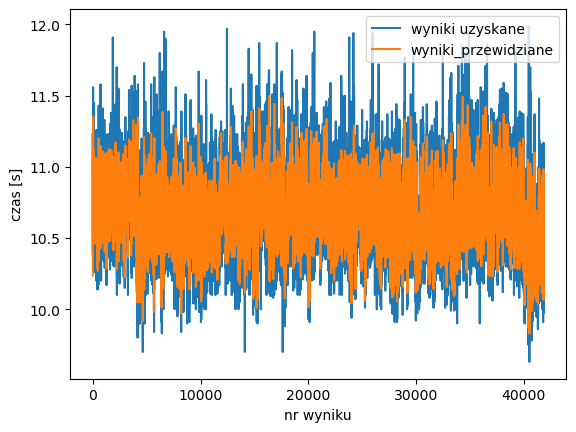

In [ ]:
plt.plot(wart, label='real results')
plt.plot(predyk, label = 'predicted results')
plt.xlabel('number oof result')
plt.ylabel('time [s]')
plt.legend(loc='upper right')